In [20]:
import matplotlib
import pandas as pd
import numpy as np
#import cbor2
import librosa
from scipy.signal import butter
from scipy.signal import lfilter
from scipy.signal import filtfilt
from scipy.signal import freqz
from scipy.signal import sosfreqz
import matplotlib.pyplot as plt
#import plotly.express as px
import IPython.display as ipd
import scipy.signal as signal
import librosa.display

In [2]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes);


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='lowpass', output='ba', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    #y = lfilter(b, a, data)
    y = filtfilt(b, a, data)
    return y;


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def cbor2csv(filename):
    '''
    Function to convert cbro files to csv.
    Depends on: Numpy, Pandas and Cbor2 library
    Input: Filename with cbor
    Output: Stores the same name csv file
    '''
    with open(filename, 'rb') as fp:
        obj = cbor2.load(fp)  
        pd.DataFrame(data=np.array(obj['payload']['values']),columns=['X','Y','Z']).to_csv(filename.split('.')[0]+".csv", index=False)



In [3]:
y_o, fs = librosa.load("data/Devvrat_4_sitting.wav", sr=16000)
t_o = [s/fs for s in range(0,len(y_o))]

'''
order = 2
low_cut = 0.2
high_cut = 0.3
y_f = butter_bandpass_filter(y_o, low_cut, high_cut, fs, order=order)
t_f = [s/fs for s in range(0,len(y_f))]

fig, ax = plt.subplots(1,1,figsize=(8,4))

ax2 = ax.twinx()
ax.plot(t_o,y_o, 'b-', label='Unfiltered', alpha=0.5)
ax2.plot(t_f,y_f, 'g-', label='Filtered at 0.3 Hz')

#ax[0].plot(t_o,y_o)
#ax[1].plot(t_f,y_f)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
fig.legend()
'''

"\norder = 2\nlow_cut = 0.2\nhigh_cut = 0.3\ny_f = butter_bandpass_filter(y_o, low_cut, high_cut, fs, order=order)\nt_f = [s/fs for s in range(0,len(y_f))]\n\nfig, ax = plt.subplots(1,1,figsize=(8,4))\n\nax2 = ax.twinx()\nax.plot(t_o,y_o, 'b-', label='Unfiltered', alpha=0.5)\nax2.plot(t_f,y_f, 'g-', label='Filtered at 0.3 Hz')\n\n#ax[0].plot(t_o,y_o)\n#ax[1].plot(t_f,y_f)\nax.set_xlabel('Time')\nax.set_ylabel('Amplitude')\nfig.legend()\n"

In [32]:
n_fft = 1024
hop_length = n_fft//4 #the default value in librosa 
print("Number of sample in audio = {}".format(y_o.shape[0]))
print("Number of frames = {}".format((y_o.shape[0]-n_fft)/hop_length+1))
print("Number of frequency components in a frame = {}".format(n_fft/2+1))

Number of sample in audio = 321536
Number of frames = 1253.0
Number of frequency components in a frame = 513.0


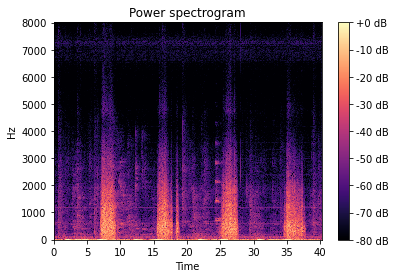

In [33]:
S = np.abs(librosa.stft(y_o,hop_length=hop_length,n_fft=n_fft))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='linear', x_axis='time', ax=ax, sr=fs)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [18]:
S.shape

(17, 40193)

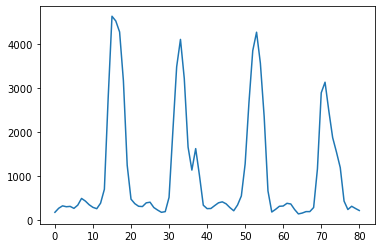

In [75]:
plt.plot(np.sum(S.T,axis=1))
#S.T[0][:].shape

In [46]:
1024//4

256

In [47]:
(y_o.shape[0]-1024)/256

1252.0

321536